# ELUVIO DS CHALLENGE

## Read in the data

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.metrics import mean_squared_error

In [134]:
df = pd.read_csv('Eluvio_DS_Challenge.csv')

## Explore the data
1) Get the data types of the columns

2) Check for null values and drop columns with a lot null values

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509236 entries, 0 to 509235
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   time_created  509236 non-null  int64 
 1   date_created  509236 non-null  object
 2   up_votes      509236 non-null  int64 
 3   down_votes    509236 non-null  int64 
 4   title         509236 non-null  object
 5   over_18       509236 non-null  bool  
 6   author        509236 non-null  object
 7   category      509236 non-null  object
dtypes: bool(1), int64(3), object(4)
memory usage: 27.7+ MB


In [136]:
df.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews


We can see that the dataframe has no missing values, we can now go ahead with exploring the individual columns.

Since the 'downvote' columns has a lot of zeros, we will visualize how many articles have zero downvotes

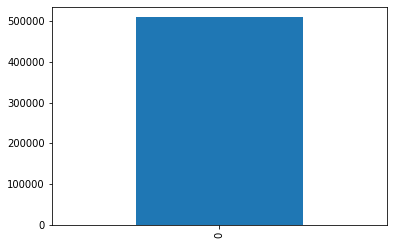

In [137]:
df['down_votes'].value_counts().plot(kind = 'bar')

In [138]:
df['down_votes'].value_counts()

0    509236
Name: down_votes, dtype: int64

We can see that there are no articles with a downvote, therefore this column might not be very useful in our analysis of this datastet

False    508916
True        320
Name: over_18, dtype: int64


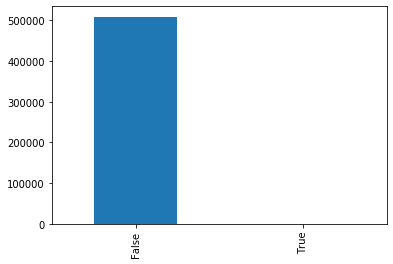

In [139]:
df['over_18'].value_counts().plot(kind = 'bar')
print(df['over_18'].value_counts()) # Only 320 articles fall under over 18

There are very few articles, 320, to be precise, which fall under the over_18 category

worldnews    509236
Name: category, dtype: int64


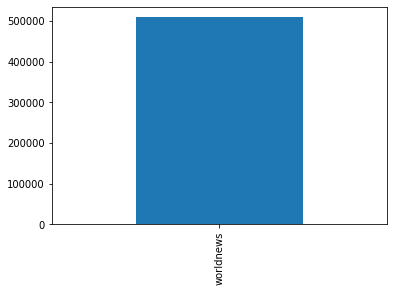

In [140]:
df['category'].value_counts().plot(kind = 'bar')
print(df['category'].value_counts()) 

We can see that there is only one category of articles, which is world news

## Explorotary Analysis

### Analysing the relationship between year/day of the week the article was posted and the average upvotes

In [141]:
# Converting the date_created column to datetime type since it is an object type
df['date_created']= pd.to_datetime(df['date_created'])
df['time_created']= pd.to_datetime(df['time_created'])
df['year'] = df['date_created'].dt.year
df['day'] = df['date_created'].dt.day_name()
df

,time_created,date_created,up_votes,down_votes,title,over_18,author,category,year,day
0,1970-01-01 00:00:01.201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews,2008,Friday
1,1970-01-01 00:00:01.201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews,2008,Friday
2,1970-01-01 00:00:01.201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews,2008,Friday
3,1970-01-01 00:00:01.201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews,2008,Friday
4,1970-01-01 00:00:01.201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews,2008,Friday
...,...,...,...,...,...,...,...,...,...,...
509231,1970-01-01 00:00:01.479816764,2016-11-22,5,0,Heil Trump : Donald Trump s alt-right white...,False,nonamenoglory,worldnews,2016,Tuesday
509232,1970-01-01 00:00:01.479816772,2016-11-22,1,0,There are people speculating that this could b...,False,SummerRay,worldnews,2016,Tuesday
509233,1970-01-01 00:00:01.479817056,2016-11-22,1,0,Professor receives Arab Researchers Award,False,AUSharjah,worldnews,2016,Tuesday
509234,1970-01-01 00:00:01.479817157,2016-11-22,1,0,Nigel Farage attacks response to Trump ambassa...,False,smilyflower,worldnews,2016,Tuesday


### Calculate the average number of upvotes based on the year

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


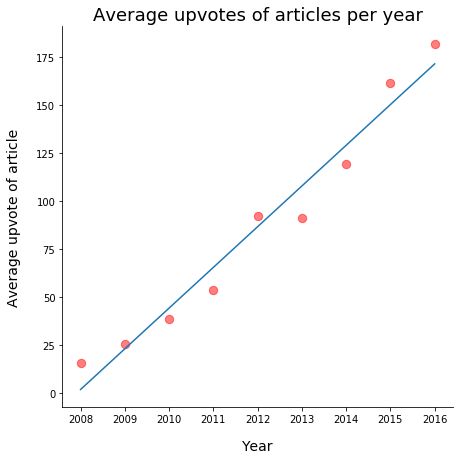

In [142]:
temp_df = df.groupby(["year"],as_index = False)['up_votes'].mean()

plt.figure(figsize=(7, 7))
plt.scatter(x = temp_df['year'], y = temp_df['up_votes'],c='red', s=70, alpha=0.5)
plt.title("Average upvotes of articles per year", fontsize=18)
plt.xlabel("Year", fontsize=14, labelpad=15)
plt.ylabel("Average upvote of article", fontsize=14, labelpad=15)

#Adding a trendline to the scatterplot
z = np.polyfit(temp_df['year'], temp_df['up_votes'], 1)
p = np.poly1d(z)
plt.plot(temp_df['year'],p(temp_df['year']))

ax = plt.subplot()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

Here, given the trendline of average upvotes of articles per year, we notice that there is a steady increase in the average number of upvotes across the years

### Visualizing the average upvotes based on the day the article was posted

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


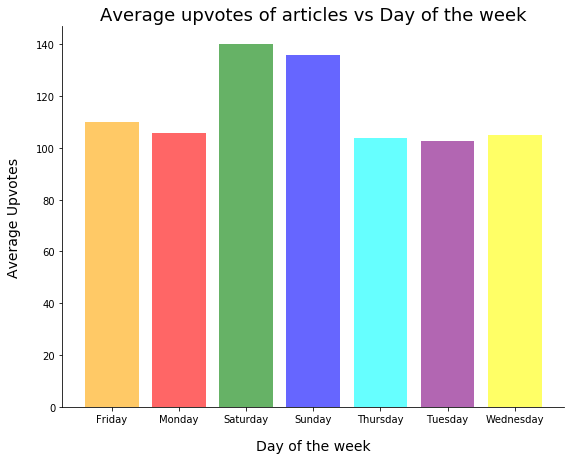

In [143]:
day_df = df.groupby(["day"],as_index = False)['up_votes'].mean()

plt.figure(figsize=(9, 7))
plt.bar(day_df["day"],day_df["up_votes"], color=['orange', 'red', 'green', 'blue', 'cyan', 'purple','yellow'],
        alpha=0.6)
plt.title("Average upvotes of articles vs Day of the week", fontsize=18)
plt.xlabel("Day of the week", fontsize=14, labelpad=15)
plt.ylabel("Average Upvotes", fontsize=14, labelpad=15)

ax = plt.subplot()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

We can see that articles posted on Saturday and Sunday have a higher average of upvotes as compared to other days. 
Articles posted on the rest of the days have a similar average of upvotes. This 

### Analysing the authors of articles

#### 1) Top 25 authors in terms of the number of articles posted
#### 2) Top 25 authors in terms of the average upvotes per article

In [144]:
top25_df = df["author"].value_counts().rename_axis('author').reset_index(name='num_articles')
top25_df

,author,num_articles
0,davidreiss666,8897
1,anutensil,5730
2,DoremusJessup,5037
3,maxwellhill,4023
4,igeldard,4013
...,...,...
85833,koi_8,1
85834,analyzethedata,1
85835,bubscuf,1
85836,dsrvi,1


In [145]:
author_df = df.groupby(["author"], as_index = False)['up_votes'].mean()
author_upvotes_df = pd.merge(top25_df,author_df, on = 'author')
author_upvotes_df.sort_values(by=['up_votes'], inplace=True, ascending = False)
author_upvotes_df

,author,num_articles,up_votes
66249,navysealassulter,1,12333.0
56646,seapiglet,1,11288.0
32174,DawgsOnTopUGA,1,10515.0
40319,Flamo_the_Idiot_Boy,1,10289.0
73570,haunted_cheesecake,1,9408.0
...,...,...,...
66769,beaucoupzombie,1,0.0
47826,tmorgan175,1,0.0
66756,someone_whos_noone,1,0.0
66755,Onecho,1,0.0


Here we can see that the top 25 authors based on average upvotes includes authors who have posted just one article. Therefore this might not be the best indicator and is skewed to people with lesser number of articles. A better indicator might be the sum of the upvotes for all aritcles they have posted

In [146]:
new_author_df = df.groupby(["author"],as_index = False)['up_votes'].sum()
new_author_upvotes_df = pd.merge(top25_df,new_author_df, on = 'author')
new_author_upvotes_df.sort_values(by=['up_votes'], inplace=True, ascending = False)
final_author_df = new_author_upvotes_df.head(25)
final_author_df

,author,num_articles,up_votes
3,maxwellhill,4023,1985416
1,anutensil,5730,1531544
14,Libertatea,2108,832102
2,DoremusJessup,5037,584380
23,Wagamaga,1490,580121
11,NinjaDiscoJesus,2448,492582
9,madazzahatter,2503,428966
7,madam1,2658,390541
0,davidreiss666,8897,338306
27,kulkke,1199,333311


## Plotting the sum of upvotes per author

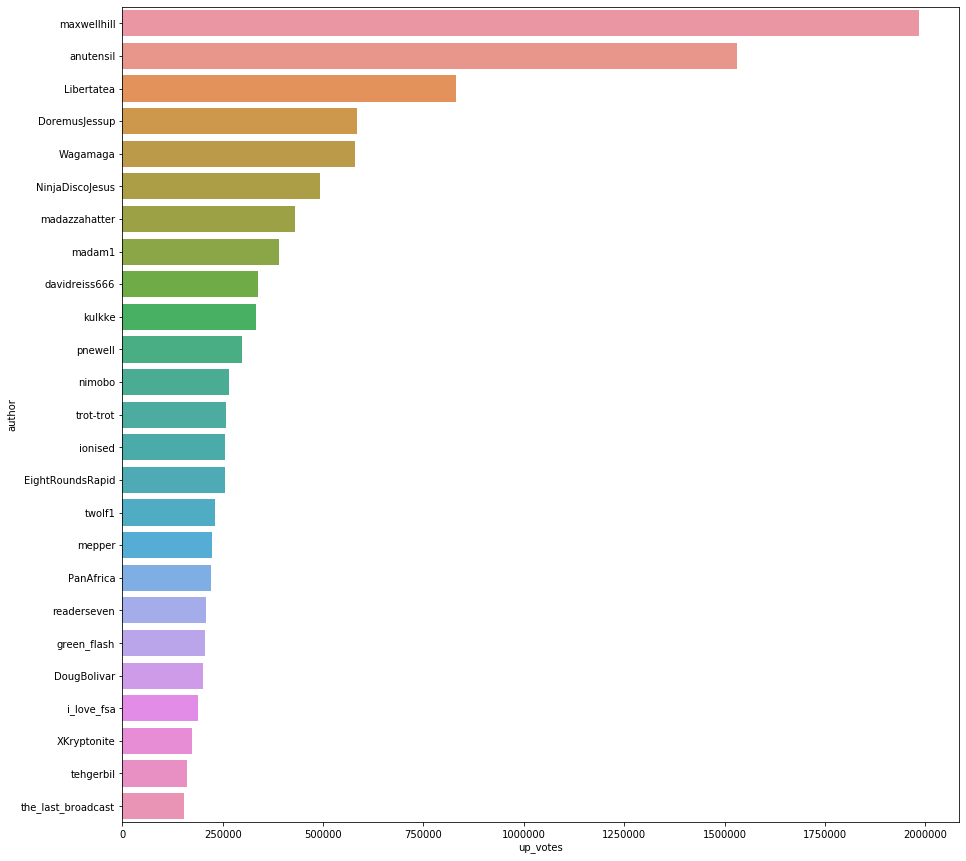

In [147]:
plt.figure(figsize=(15, 15))
sns.barplot(y = final_author_df["author"], x = final_author_df["up_votes"])

Here, we have a visualization of the top 25 authors in terms of the sum of upvotes. From the analysis above, we can see that there is no direct correlation between the number of articles posted by the author and the sum of their upvotes, since we can see that this list also includes authors with 699 articles as well as 8897 articles

## Analysing the text in the headlines

Now, we will focus on analysing the text in the headlines of the articles. Through this practice, I am trying to understand/predict the text in the headlines and how it relates to the upvotes

### Find the top 100 headlines based on upvotes

In [148]:
top_100_headlines = df.nlargest(100, 'up_votes')
top_100_headlines

,time_created,date_created,up_votes,down_votes,title,over_18,author,category,year,day
377200,1970-01-01 00:00:01.434818471,2015-06-20,21253,0,A biotech startup has managed to 3-D print fak...,False,KRISHNA53,worldnews,2015,Saturday
391415,1970-01-01 00:00:01.440421079,2015-08-24,13435,0,Twitter has forced 30 websites that archive po...,False,joeyoungblood,worldnews,2015,Monday
450818,1970-01-01 00:00:01.459706506,2016-04-03,13244,0,2.6 terabyte leak of Panamanian shell company ...,False,mister_geaux,worldnews,2016,Sunday
391318,1970-01-01 00:00:01.440367768,2015-08-23,12333,0,The police officer who leaked the footage of t...,False,navysealassulter,worldnews,2015,Sunday
390252,1970-01-01 00:00:01.439939168,2015-08-18,11288,0,Paris shooting survivor suing French media for...,False,seapiglet,worldnews,2015,Tuesday
...,...,...,...,...,...,...,...,...,...,...
457257,1970-01-01 00:00:01.461844338,2016-04-28,7752,0,Airstrike destroys Doctors Without Borders hos...,False,Quincy6533,worldnews,2016,Thursday
488122,1970-01-01 00:00:01.472491944,2016-08-29,7727,0,"A decade on, vaccine has halved cervical cance...",False,NinjaDiscoJesus,worldnews,2016,Monday
455267,1970-01-01 00:00:01.461186902,2016-04-20,7724,0,Declassified memo shows multiple Saudi connect...,False,CumcastXXXfinity,worldnews,2016,Wednesday
496164,1970-01-01 00:00:01.475344901,2016-10-01,7724,0,South Korean President Park Geun-hye has calle...,False,_Perfectionist,worldnews,2016,Saturday


### Find the top 50 words in terms of their frequency in the top 100 headlines

In [199]:
top_100 = prepare_text(top_100_headlines)
top_100
from collections import Counter
cnt = top_100.apply(lambda x:Counter(x['lemmatized']),axis=1).sum()
top_50_words = cnt.most_common(50)
top_50_words_df = pd.DataFrame({'word_freq': top_50_words})
word = []
frequency = []
for i in top_50_words_df['word_freq']:
    new_word, new_freq = i
    word.append(new_word)
    frequency.append(new_freq)
top_50_words_df['word'] = word
top_50_words_df['freq'] = frequency
top_50_words_df = top_50_words_df.drop(['word_freq'], axis = 1)
top_50_words_df = top_50_words_df.drop(top_50_words_df.index[0])


### Plot the top 50 words and their frequencies in the headlines

I preffered to use a bar plot instead of a word cloud as the word cloud often does not portray the importance of smaller words well

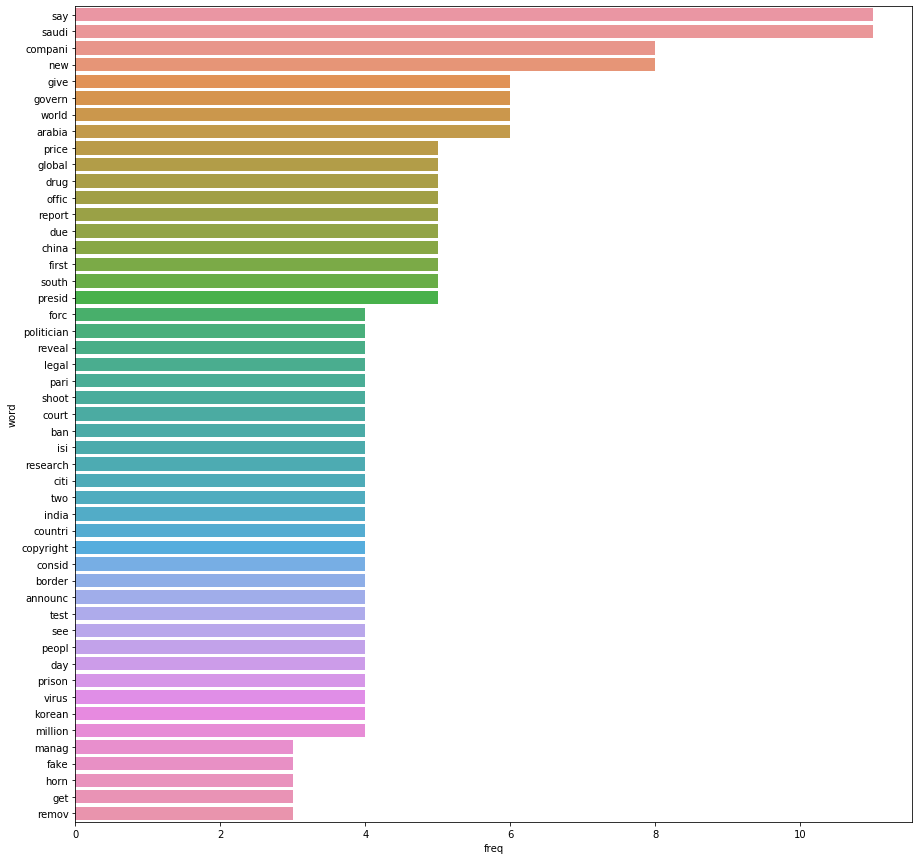

In [201]:
plt.figure(figsize=(15, 15))
sns.barplot(y = top_50_words_df['word'],x = top_50_words_df['freq'])


### Approach to analyze text data with NLP and building predictive models

1)First we will tokenize the headlines, stem the words and lemmatize it to prepare our text

2)Create a bag of words vector using this approach in NLP

3)Train and score a model to predict the upvotes for a given headline

#### We will first stem and lemmatize our words before making our bag of words matrix

In [150]:
list_stopwords = stopwords.words('english')
stemmer = SnowballStemmer(language='english')
wordnet_lemmatizer = WordNetLemmatizer()

In [151]:
sample = df.sample(frac=0.1, random_state=0)
sample

,time_created,date_created,up_votes,down_votes,title,over_18,author,category,year,day
231048,1970-01-01 00:00:01.385298088,2013-11-24,1,0,Israeli Leaders Decry Geneva Accord,False,dharmateja,worldnews,2013,Sunday
418777,1970-01-01 00:00:01.448966669,2015-12-01,6,0,U.S. Backed Rebels Continue to Fight One Anoth...,False,Versutas,worldnews,2015,Tuesday
412803,1970-01-01 00:00:01.447512473,2015-11-14,18,0,Man Arrested In Germany With Weapons In Car Ma...,False,middleeastnewsman,worldnews,2015,Saturday
349822,1970-01-01 00:00:01.425468653,2015-03-04,0,0,Netanyahu responds to Obama: We did indeed pre...,False,IBiteYou,worldnews,2015,Wednesday
18241,1970-01-01 00:00:01.225309084,2008-10-29,30,0,Gordon Brown s terror claims for ID cards are ...,False,igeldard,worldnews,2008,Wednesday
...,...,...,...,...,...,...,...,...,...,...
478578,1970-01-01 00:00:01.469085287,2016-07-21,5,0,Bangladesh forces arrest JMB leader Mahmudul H...,False,Williameiok,worldnews,2016,Thursday
398554,1970-01-01 00:00:01.443011983,2015-09-23,2,0,"Egypt’s Sisi pardons 100 prisoners, including ...",False,nirataro,worldnews,2015,Wednesday
45887,1970-01-01 00:00:01.259324883,2009-11-27,95,0,What I saw was a bunch of filled-in trenches ...,False,SolInvictus,worldnews,2009,Friday
343879,1970-01-01 00:00:01.423683909,2015-02-11,33,0,Durban University of Technology s SRC calls fo...,False,pitmot,worldnews,2015,Wednesday


### Preparing the text by tokenization, stemming and lemmatization and applying it to our data frame

In [152]:
def prepare_text(df):
    df["title"] = df["title"].apply(str)
    
    df['title'] = df['title'].str.replace('\d+', '') # for removing digits
    df['title'] = df['title'].str.replace(r'(\b\w{1,2}\b)', '') # for removing words less than 3 characters
    df['title'] = df['title'].str.replace('[^\w\s]', '') # for removing punctuation 
    
    
    df['tokenized_headlines'] = df['title'].apply(nltk.word_tokenize) 
    df['stemmed'] = df['tokenized_headlines'].apply(lambda x: [stemmer.stem(y) for y in x if y not in list_stopwords])
    df['lemmatized'] = df['stemmed'].apply(lambda x: [wordnet_lemmatizer.lemmatize(y,'v') for y in x])
    
    return df

In [20]:
get_result = prepare_text(df.sample(frac = 0.01,random_state=0))
get_result

,time_created,date_created,up_votes,down_votes,title,over_18,author,category,year,day,tokenized_headlines,stemmed,lemmatized
231048,1970-01-01 00:00:01.385298088,2013-11-24,1,0,Israeli Leaders Decry Geneva Accord,False,dharmateja,worldnews,2013,Sunday,"[Israeli, Leaders, Decry, Geneva, Accord]","[isra, leader, decri, geneva, accord]","[isra, leader, decri, geneva, accord]"
418777,1970-01-01 00:00:01.448966669,2015-12-01,6,0,Backed Rebels Continue Fight One Another Nu...,False,Versutas,worldnews,2015,Tuesday,"[Backed, Rebels, Continue, Fight, One, Another...","[back, rebel, continu, fight, one, anoth, nusr...","[back, rebel, continu, fight, one, anoth, nusr..."
412803,1970-01-01 00:00:01.447512473,2015-11-14,18,0,Man Arrested Germany With Weapons Car May Ha...,False,middleeastnewsman,worldnews,2015,Saturday,"[Man, Arrested, Germany, With, Weapons, Car, M...","[man, arrest, germani, with, weapon, car, may,...","[man, arrest, germani, with, weapon, car, may,..."
349822,1970-01-01 00:00:01.425468653,2015-03-04,0,0,Netanyahu responds Obama did indeed present ...,False,IBiteYou,worldnews,2015,Wednesday,"[Netanyahu, responds, Obama, did, indeed, pres...","[netanyahu, respond, obama, inde, present, pra...","[netanyahu, respond, obama, inde, present, pra..."
18241,1970-01-01 00:00:01.225309084,2008-10-29,30,0,Gordon Brown terror claims for cards are bu...,False,igeldard,worldnews,2008,Wednesday,"[Gordon, Brown, terror, claims, for, cards, ar...","[gordon, brown, terror, claim, card, bunkum, s...","[gordon, brown, terror, claim, card, bunkum, s..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23537,1970-01-01 00:00:01.231694206,2009-01-11,0,0,thwarts Israeli plan bomb Iranian nuclear fa...,False,yoda17,worldnews,2009,Sunday,"[thwarts, Israeli, plan, bomb, Iranian, nuclea...","[thwart, isra, plan, bomb, iranian, nuclear, f...","[thwart, isra, plan, bomb, iranian, nuclear, f..."
464079,1970-01-01 00:00:01.464186222,2016-05-25,2,0,Germany renewables electricity generation grow...,False,JackassWhisperer,worldnews,2016,Wednesday,"[Germany, renewables, electricity, generation,...","[germani, renew, electr, generat, grow, coal, ...","[germani, renew, electr, generat, grow, coal, ..."
70377,1970-01-01 00:00:01.293228034,2010-12-24,0,0,Pajamas Media Iran Just Shipped Missiles Ven...,False,dbe944,worldnews,2010,Friday,"[Pajamas, Media, Iran, Just, Shipped, Missiles...","[pajama, media, iran, just, ship, missil, vene...","[pajama, media, iran, just, ship, missil, vene..."
449772,1970-01-01 00:00:01.459330197,2016-03-30,3,0,Korea Iran officials meet over economy Korea,False,elusive_newsman,worldnews,2016,Wednesday,"[Korea, Iran, officials, meet, over, economy, ...","[korea, iran, offici, meet, economi, korea]","[korea, iran, offici, meet, economi, korea]"


#### We then use the CountVectorizer object in sci-kit learn to make our bag of words

In [21]:
## Function to prepare the inputs into our model
## This function takes in a Pandas dataframe, and a vectorizer object parameters

def dummy(doc):
    return doc

def make_xy(get_result, vectorizer=None):
    if vectorizer is None:
        vectorizer = CountVectorizer(tokenizer= dummy,preprocessor=dummy)#lowercase=True, stop_words="english", tokenizer=LemmaTokenizer())
        
    headline_text = list(get_result.lemmatized)
    vectorizer.fit(headline_text)
    
    X = vectorizer.transform(headline_text)
    X = X.toarray()
    Y = np.array(get_result["up_votes"].values)
    return X, Y

### Preparing the inputs to our model

In [22]:
X, Y = make_xy(get_result)
X

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [54]:
Y

array([ 1,  6, 18, ...,  0,  3,  0])

In [24]:
np.random.seed(100)
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size = 0.33, random_state = 0)

Now that we have our data inputs prepared, let us train a simple linear regression model to predict upvotes based on words in the headlines and check our accuracy

## Training Linear Regression Model to predict upvotes based on the headlines

In [29]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
train_predictions = lr.predict(xtest)

mse = np.sqrt(mean_squared_error(predictions, ytest))
print(mse)


819.4269254986394


In [31]:
df["up_votes"].mean()

112.23628337352426

After seeing the root mean squared error of 819.43 and considering our average upvotes for the post is 112.2 we can see that this is not a very good model. We might have to try a gradient booster regressor model to see if we get a better accuracy

## Logistic Regression Model

In [49]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression(C= 0.1, penalty='l2', tol=0.01)


In [50]:
logistic_reg.fit(xtrain, ytrain)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False)

In [51]:
lr_rmse = np.sqrt(mean_squared_error(ytest, logistic_reg.predict(xtest)))
lr_rmse

435.7115092968396

We have gotten a much better rmse with our logistic regressor with l2 penalty, however it is still relatively high compared to our average upvotes, let us try a gradient booster model

## Gradient Booster Regression Model

In [40]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=70, max_depth=5)
gbr.fit(xtrain, ytrain)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=70,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [42]:
gb_rmse = np.sqrt(mean_squared_error(ytest, gbr.predict(xtest)))
gb_rmse

531.4145970860176

Our rmse has reduced significantly with this model, however, it is still relatively large compared to our average upvotes and higher than our logistic regressor

## Random Forest Regression model

In [66]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators= 500, max_depth=10, max_features = 'sqrt')

In [67]:
rf.fit(xtrain, ytrain)
predictions = rf.predict(xtest)

In [68]:
rmse = np.sqrt(mean_squared_error(predictions, ytest))
print(rmse)

428.64945592898187


This seems to be our best model till now, however, we need to reduce our rmse significantly more to make accurate predictions about the upvotes

## CONCLUSION:

1) In the four models that we attempted, we got high errors in terms of our average upvotes, however, a random forest regressor gave us our best accuracy till now. There could be multiple reasons for this, one being that we had to train our model on a random sample of 10% of our total data to save runtime and better computation efficiency and second owing to the fact that the headlines might not be the best indicator for upvotes. 

2) We can see that the average upvotes have increased over the years and articles posted on weekends have a higher chance of garnering more upvotes. 

3) Although, we were able to find the sum of upvotes received by authors over the year for the articles thye posted, there was no clear correlation established between number of articles posted and the sum of upvotes.

This was an attempt to efficiently use text data to train multiple predictive models in NLP to see how the text in the headlines is related to upvotes. Next steps would be to clean up the data further and approcach the problem with more specifc questions about the text such as extracting specific verbs and countries and correlate that to the upvotes to see the effect which might help in better training the model for more accurate predictions.